# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [35]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.filters import threshold_otsu

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


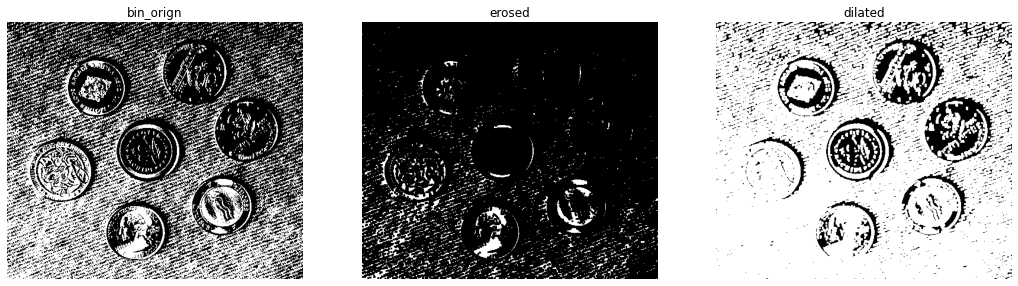

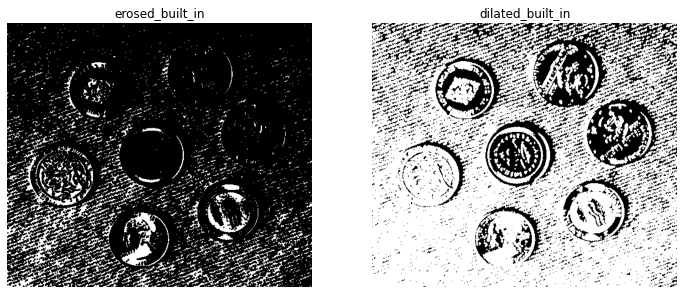

In [36]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
''' 

def erosion(img,w):
    er = np.array(img)
    v_off = w.shape[0]//2
    h_off = w.shape[1]//2
    mod = w.shape[0]%2
    modified = np.pad(er, v_off, 'constant', constant_values=(1))
    for i in range(v_off,modified.shape[0]-v_off):
        for j in range(h_off,modified.shape[1]-h_off):
            temp = modified[i-v_off:i+v_off+mod,j-h_off:j+h_off+mod]
            er[i-v_off,j-v_off]= ((temp * w) == w).all()
    return er
                
                
def dilation(img,w):
    di = np.array(img)
    v_off = w.shape[0]//2
    h_off = w.shape[1]//2
    mod = w.shape[0]%2
    modified = np.pad(di, v_off, 'constant', constant_values=(0))
    for i in range(v_off,modified.shape[0]-v_off):
        for j in range(h_off,modified.shape[1]-h_off):
            temp = modified[i-v_off:i+v_off+mod,j-h_off:j+h_off+mod]
            di[i-v_off,j-v_off] = (temp * w).any()  
    return di
            
    
wind = np.ones((3,3))
path = 'img/coins.jpg'
img = io.imread(path);
gray = rgb2gray(img)
bin_img = gray > 0.6
erosed =erosion(bin_img,wind)
dilated = dilation(bin_img,wind)
show_images([bin_img,erosed,dilated],['bin_orign','erosed','dilated'])

#built in 
gray = rgb2gray(img)
show_images([binary_erosion(bin_img),binary_dilation(bin_img)],['erosed_built_in','dilated_built_in'])





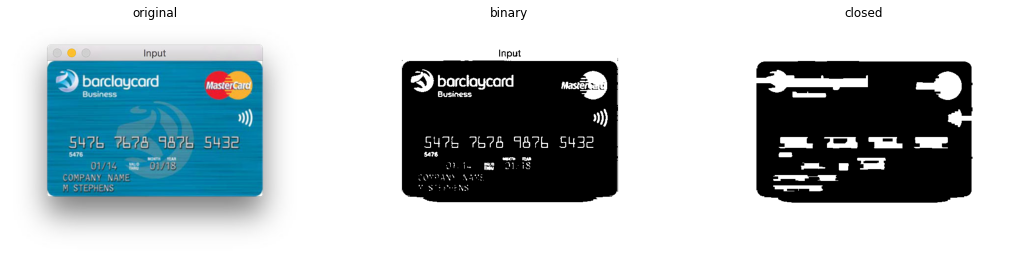

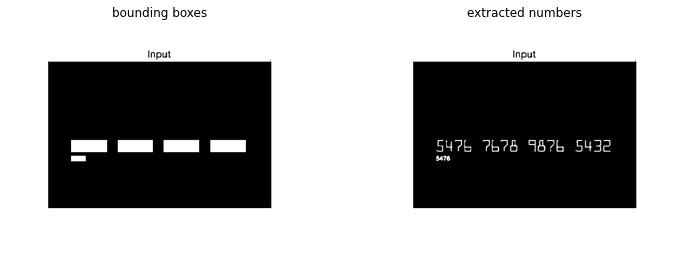

In [37]:
''' 2) Case Study: Credit Card Number Extraction

- Load "card.jpg" from the img folder
- Convert the image to binary by brightness thresholding maintaining the card number details for extraction
- Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
    Note: The goal of this step is to join the card number into 4 sets of connected pixels
- Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
    Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
            - contour[:,0] being the Y values of the contour perimeter points
            - contour[:,1] being the X values of the contour perimeter points

''' 
path = 'img/card.jpg' 
img = io.imread(path); 
gray = rgb2gray(img) 
bin_img = gray > 0.6 
w_size = 20
w = np.ones((w_size,w_size))
w[:8] = 0
w[12:] = 0
dilated = dilation(bin_img,w) 
closed = erosion(dilated,w) 

show_images([img,bin_img,closed],['original','binary','closed'])

bounding_boxes = find_contours(closed,0.8)
# When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
img_with_boxes =np.array(bin_img)
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = [ int(min(box[:,1])), int(max(box[:,1])), int(min(box[:,0])), int(max(box[:,0]))];
    aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin);
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=gray.shape);
    if aspect_ratio >= 2.5 and aspect_ratio <= 3.5:
        img_with_boxes[rr, cc] = 1; #set color white
    else: 
        img_with_boxes[rr,cc] = 0
extracted = img_with_boxes * bin_img
show_images([img_with_boxes,extracted],['bounding boxes','extracted numbers'])


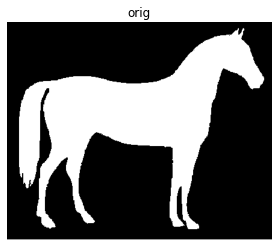

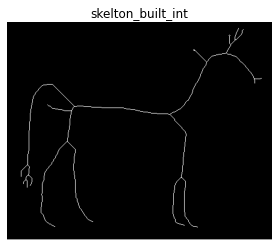

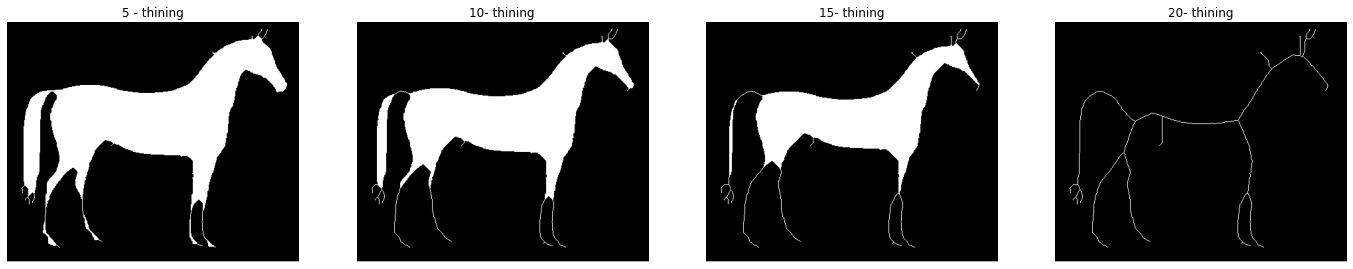

In [38]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
path = 'img/horse.jpg'
img = io.imread(path);
gray = rgb2gray(img)
bin_img = gray > 0.9
show_images([bin_img],['orig'])
sk = skeletonize(bin_img)
show_images([sk],['skelton_built_int'])
imgs = []
vals = [5,10,15,150]
for v in vals:
    th = thin(bin_img,v)
    imgs.append(th)

show_images(imgs,['5 - thining','10- thining','15- thining','20- thining'])